In [27]:
#required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import nlp
import tensorflow as tf
from transformers import pipeline, AutoTokenizer

#setting to avoid truncation of the text rows

pd.set_option('display.max_colwidth', None)

In [28]:
#extracting data for the base emotions df

data = pd.read_csv('c:/Data_Science/IH_Notebooks/IH_NLP_Final_Project/text.csv')
emotion_df = data.copy()

emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing,0
2,2,i gave up my internship with the dmrg and am feeling distraught,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative,4


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#dropping unnecessary columns

emotion_df = emotion_df.drop(columns='Unnamed: 0')

print("First 3 rows of emotion_df after column drop: \n", emotion_df.head(3))

import re

#cleaning the text

from my_functions import clean_text

emotion_df['clean_text'] = emotion_df['text'].apply(clean_text)


First 3 rows of emotion_df after column drop: 
                                                                                                                                                                                                                                          text  \
0                                                                                                                                                                                               i just feel really helpless and heavy hearted   
1  ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing   
2                                                                                                                                                                             i gave up my internship with the dmrg and am feeling di

In [31]:
emotion_df = emotion_df.drop(columns='text')

#moving the label column back on the right of the df

emotion_label_placeholder = emotion_df.pop('label')

emotion_df['label'] = emotion_label_placeholder

In [32]:
emotion_df = emotion_df.rename(columns={'clean_text': 'text'})
emotion_df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing,0
2,i gave up my internship with the dmrg and am feeling distraught,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative,4
...,...,...
416804,i feel like telling these horny devils to find a site more suited to that sort of interest the playboy if there is one forum perhaps,2
416805,i began to realize that when i was feeling agitated or restless that i would have a thought to go do the dishes,3
416806,i feel very curious be why previous early dawn in the time here don t you seek his trouble,5
416807,i feel that becuase of the tyranical nature of the government in el salvador and the savage social conditions of the general people that the set of thought to run the shoe shop in miguel marmols testimoney was able to work,3


In [33]:
from sklearn.utils import resample

#resampling emotion_df to have 6000 rows

sadness = emotion_df.loc[emotion_df['label'] == 0]
joy = emotion_df.loc[emotion_df['label'] == 1]
love = emotion_df.loc[emotion_df['label'] == 2]
anger = emotion_df.loc[emotion_df['label'] == 3]
fear = emotion_df.loc[emotion_df['label'] == 4]
surprise = emotion_df.loc[emotion_df['label'] == 5]

undersampled_sadness = resample(sadness, replace=True, n_samples=1000, random_state=42)
undersampled_joy = resample(joy, replace=True, n_samples=1000, random_state=42)
undersampled_love = resample(love, replace=True, n_samples=1000, random_state=42)
undersampled_anger = resample(anger, replace=True, n_samples=1000, random_state=42)
undersampled_fear = resample(fear, replace=True, n_samples=1000, random_state=42)
undersampled_surprise = resample(surprise, replace=True, n_samples=1000, random_state=42)

dfs = [undersampled_sadness, undersampled_joy, undersampled_love, undersampled_anger, undersampled_fear, undersampled_surprise]

undersampled_emotion_df = pd.concat(dfs, ignore_index=True)

undersampled_emotion_df


,text,label
0,im feeling terrible,0
1,i am lbs overweight and the sudden burst of training has left me feeling dull and stale,0
2,i usually feel resigned that if i know it i know it if not it is too late now,0
3,i was a part of that group but i left due to feeling disheartened with my internet speed and lack of money to buy a second hand one and i created my own group for artipoppe virgins those who have never managed to bag one for themselves,0
4,i am so far from normal that it s not funny i just feel stupid and tiny and cheated,0
...,...,...
5995,i think is slowly killing me and feeling like crud i am surprised i made it to friday,5
5996,i started feeling flu ish i was pretty surprised,5
5997,i have used these opportunities to feel contempt disgust and shame about the others instead of truly being curious about what motivates their behavior and what are they are attempting to share about themselves,5
5998,im sick of being exhausted all the time of rushing around school of feeling dazed and repressed of not having time to see my friends because i have too much to do of worrying about grades of forcing myself to tolerate small talk,5


In [34]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
#setting the language to English
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
def stopword_remove(text):
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

undersampled_emotion_df['text'] = undersampled_emotion_df['text'].apply(stopword_remove)

# Model compilation with Adam optimizer

In [41]:
#RoBERTa base model

X = undersampled_emotion_df['text']
y = undersampled_emotion_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

#Tokenizer

from transformers import AutoTokenizer, AutoConfig, TFAutoModelForSequenceClassification

model_name = "j-hartmann/emotion-english-distilroberta-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
config = AutoConfig.from_pretrained(model_name, num_labels=6)

model = TFAutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config,
    ignore_mismatched_sizes=True
)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some weights of TFRobertaForSequenceClassification were not initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base and are newly initialized because the shapes did not match:
- classifier/out_proj/kernel:0: found shape (768, 7) in the checkpoint and (768, 6) in the model instantiated
- classifier/out_proj/bias:0: found shape (7,) in the checkpoint and (6,) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [42]:
def mooder(text):
    """
    This function will return the mood of the text
        returns_tensors="tf" will return the tokens as a TensorFlow tensor
        max_length=512 will limit the number of tokens to 512
        truncation=True will truncate the text if it exceeds the max_length
        padding="longest" will pad the text to the longest sequence in the batch
    """
    encoded_text = tokenizer(text, return_tensors="tf", max_length=512, truncation=True, padding="longest")
    output = model(encoded_text)
    scores = output.logits[0].numpy()
    moods = {
        "anger": scores[0],
        "joy": scores[1],
        "fear": scores[2],
        "love": scores[3],
        "surprise": scores[4],
        "sadness": scores[5]
    }

    max_mood = max(moods, key=moods.get)
    print(f"Your mood appear to be {max_mood}")

    if max_mood == 'joy':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    elif max_mood == 'anger':
        print(f"The detected emotion is {max_mood}. Further investigation required.")
    elif max_mood == 'fear':
        print(f"The detected emotion is {max_mood}. Further investigation may be required.")
    elif max_mood == 'love':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    elif max_mood == 'surprise':
        print(f"The detected emotion is {max_mood}. No further investigation required.")
    else:
        print(f"The detected emotion is {max_mood}. No further investigation may be required.")
    return moods

In [49]:
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512, return_tensors="tf")
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=512, return_tensors="tf")

import tensorflow as tf

train_labels = tf.convert_to_tensor(list(y_train))
test_labels = tf.convert_to_tensor(list(y_test))

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(learning_rate=2e-5),
    loss=SparseCategoricalCrossentropy(from_logits=True), #helps reducing loss during training to adapt weights automatically while training is running
    metrics=["accuracy"]
)


In [51]:
model.fit(train_dataset, validation_data=test_dataset, epochs=3)

Epoch 1/3


300/300 [==============================] - 708s 2s/step - loss: 0.5445 - accuracy: 0.8238 - val_loss: 0.2517 - val_accuracy: 0.9242
Epoch 2/3
300/300 [==============================] - 692s 2s/step - loss: 0.2337 - accuracy: 0.9240 - val_loss: 0.2089 - val_accuracy: 0.9292
Epoch 3/3
300/300 [==============================] - 696s 2s/step - loss: 0.1815 - accuracy: 0.9383 - val_loss: 0.1823 - val_accuracy: 0.9417


In [52]:
import numpy as np

preds_logits = model.predict(test_dataset)

75/75 [==============================] - 18s 218ms/step


In [53]:
y_pred = np.argmax(preds_logits.logits, axis=1)

In [54]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=[
    'sadness', 'joy', 'love', 'anger', 'fear', 'surprise'
]))

Accuracy: 0.9416666666666667

Detailed Classification Report:
              precision    recall  f1-score   support

     sadness       0.97      0.96      0.96       215
         joy       0.97      0.88      0.92       222
        love       0.89      0.97      0.93       176
       anger       0.97      0.98      0.97       204
        fear       0.96      0.88      0.92       189
    surprise       0.89      1.00      0.94       194

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



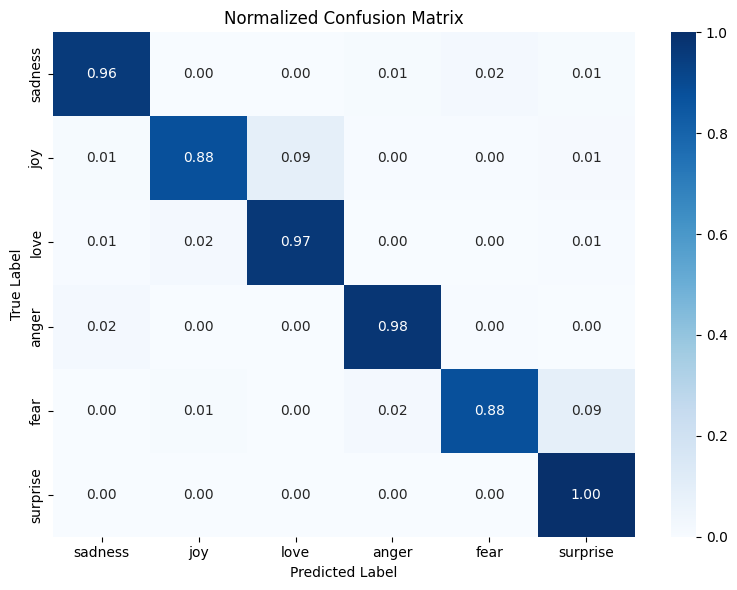

In [59]:
labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.tight_layout()
plt.show()

In [60]:
model.save("models/emotion_roberta_model")

INFO:tensorflow:Assets written to: models/emotion_roberta_model\assets


INFO:tensorflow:Assets written to: models/emotion_roberta_model\assets


In [61]:
tokenizer.save_pretrained("models/emotion_tokenizer")

('models/emotion_tokenizer\\tokenizer_config.json',
 'models/emotion_tokenizer\\special_tokens_map.json',
 'models/emotion_tokenizer\\vocab.json',
 'models/emotion_tokenizer\\merges.txt',
 'models/emotion_tokenizer\\added_tokens.json',
 'models/emotion_tokenizer\\tokenizer.json')

In [63]:
model.save_pretrained("models/models/emotion_roberta_model")
tokenizer.save_pretrained("models/models/emotion_tokenizer")

('models/models/emotion_tokenizer\\tokenizer_config.json',
 'models/models/emotion_tokenizer\\special_tokens_map.json',
 'models/models/emotion_tokenizer\\vocab.json',
 'models/models/emotion_tokenizer\\merges.txt',
 'models/models/emotion_tokenizer\\added_tokens.json',
 'models/models/emotion_tokenizer\\tokenizer.json')